In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Data Collection.zip'

Archive:  /content/drive/MyDrive/Data Collection.zip
replace Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Datas

In [ ]:
#Importing the ImageDataGenerator Library

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Define the parameters/arguments for ImageDataGenerator class

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Applying ImageDataGenerator functionality to trainset

In [ ]:
x_train=train_datagen.flow_from_directory('/content/Dataset/Dataset/train_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [ ]:
#Applying ImageDataGenerator functionality to testset

In [ ]:
x_test=test_datagen.flow_from_directory('/content/Dataset/Dataset/test_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


In [ ]:
#importing the model building libraries

In [ ]:
#To define linear intialisation import Sequential 
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To creat Convolution kernal import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#initializing the model
model=Sequential()

In [ ]:
#Adding CNN layers

In [ ]:
#add convolutional layer 
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

In [ ]:
#Adding Dense Layers

In [ ]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output Layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#configuring the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 18s 1s/step - loss: 1.5233 - accuracy: 0.6927 - val_loss: 0.1937 - val_accuracy: 0.9091
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 0.3428 - accuracy: 0.8417 - val_loss: 0.1909 - val_accuracy: 0.9256
Epoch 3/10
14/14 [==============================] - 17s 1s/step - loss: 0.3251 - accuracy: 0.8647 - val_loss: 0.1436 - val_accuracy: 0.9256
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.2507 - accuracy: 0.8899 - val_loss: 0.1158 - val_accuracy: 0.9256
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.2076 - accuracy: 0.9128 - val_loss: 0.0863 - val_accuracy: 0.9669
Epoch 6/10
14/14 [==============================] - 17s 1s/step - loss: 0.1841 - accuracy: 0.9266 - val_loss: 0.1016 - val_accuracy: 0.9339
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.2472 - accuracy: 0.8876 - val_loss: 0.0876 - val_accuracy: 0.9587
Epoch 8/10
14/14 [==

In [27]:
#save the model
model.save("forest1.h5")

In [28]:
#predictions

In [29]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [30]:
#load the saved model
model = load_model("forest1.h5")

In [31]:
img=image.load_img('/content/Dataset/Dataset/test_set/with fire/Fire_2_696x392.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128,128 ), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)


In [32]:
pred=model.predict(x)

1/1 [==============================] - 0s 97ms/step


In [33]:
pred

array([[1.]], dtype=float32)

In [34]:
#Opencv for video processing

In [35]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 41.9 MB/s 


In [36]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=9f51b82c7189decc549ecd3abf8d90f59c34e87fbcac5a6df881bd83dd8cd096
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [37]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

In [39]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model

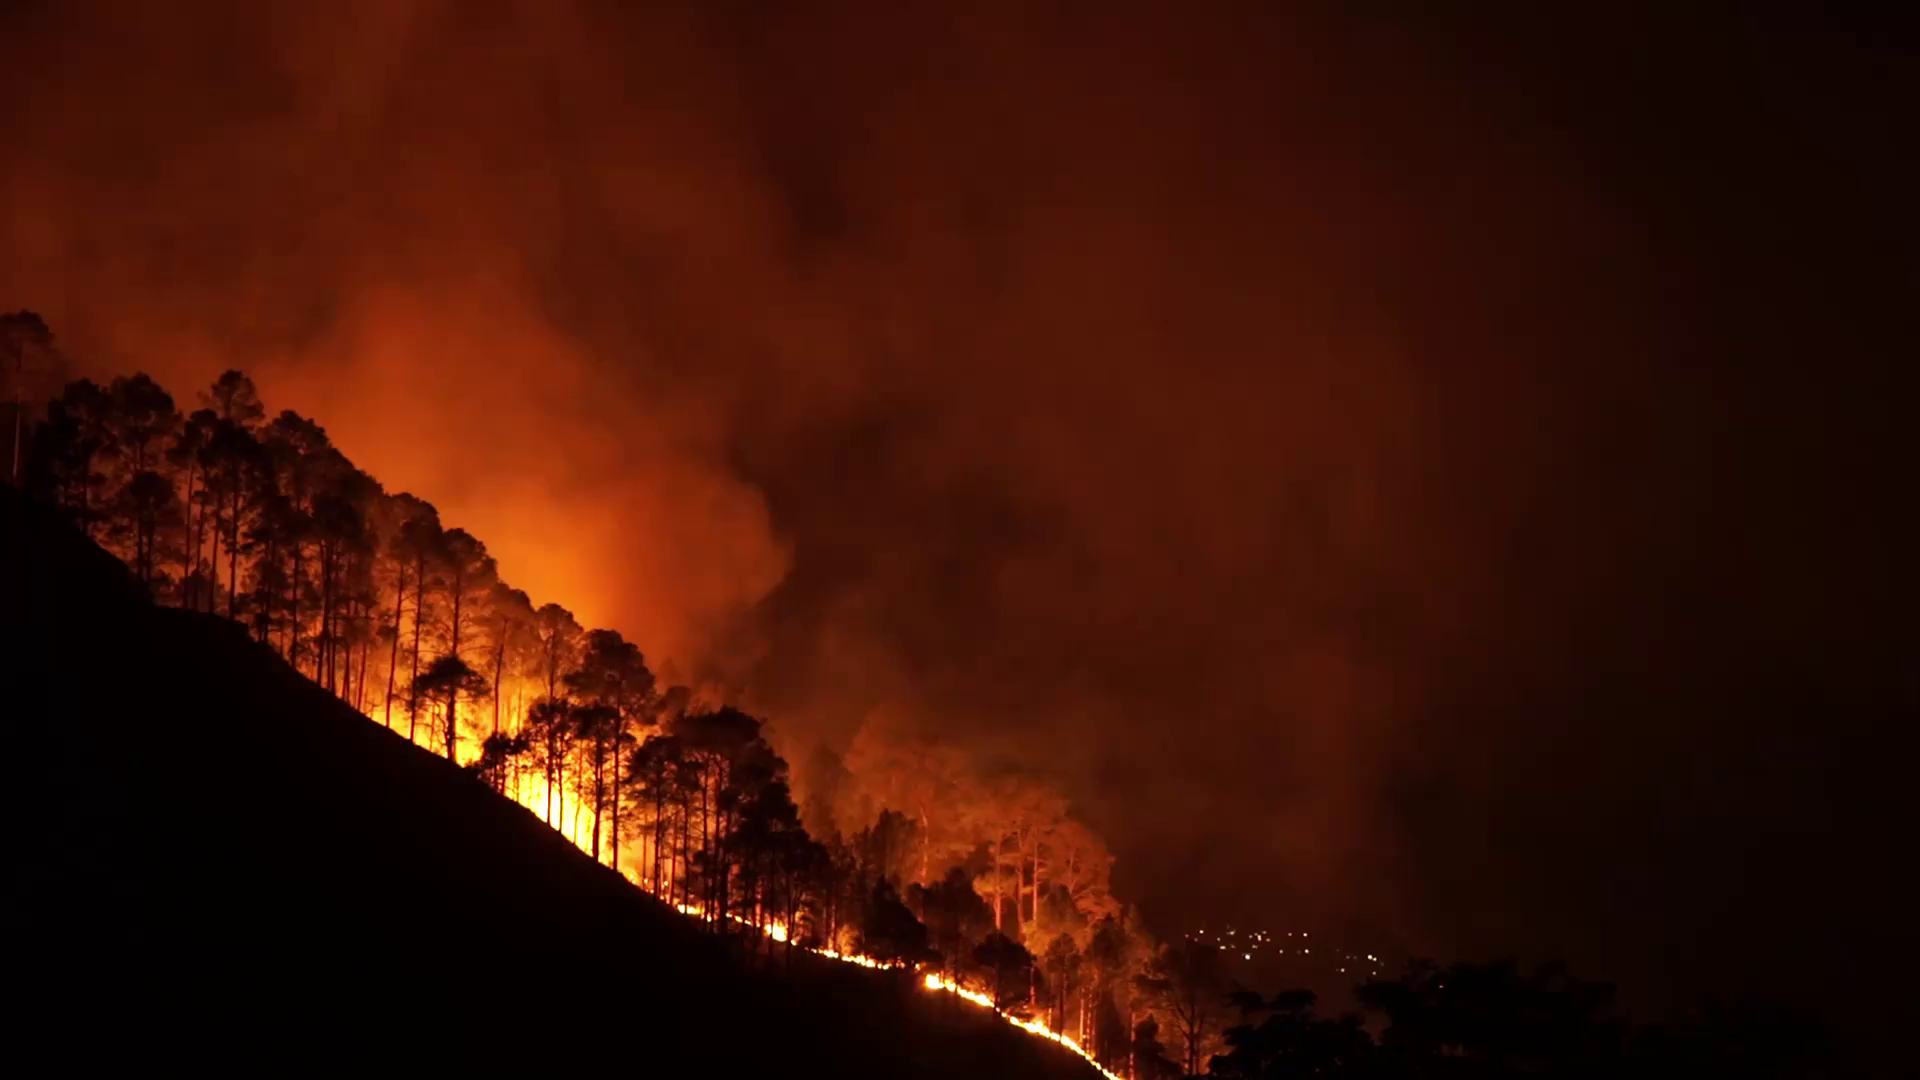

1/1 [==============================] - 0s 86ms/step
Forest fire
SMbc1e522c7c43881f76f7decd242e1712
Fire detected
SMS Sent!


In [53]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/Forest with fire.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==0:
  account_sid='AC793bc11a38751a7b2a8c3fc7f18105c5'
  auth_token='26391d62b2b327c5a97725cad8a769ef'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18176708550',
      #to number
      to='+918754125453')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")